# Exerc√≠cio 1: Perceptr√£o Simplificado

Implementa√ß√£o direta do perceptr√£o para opera√ß√£o OR conforme especificado no gui√£o.

**Objetivo**: Implementar perceptr√£o com duas entradas e uma sa√≠da para opera√ß√£o OR
- Equa√ß√£o: o = f(s), onde s = w0 + w1¬∑x1 + w2¬∑x2
- Fun√ß√£o de ativa√ß√£o: f(s) = 1 se s > 0.5, 0 caso contr√°rio
- Taxa de aprendizagem: Œ± = 0.01
- M√°ximo de √©pocas: 20


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Par√¢metros do perceptr√£o
alpha = 0.05
epochs = 20

# Dados para opera√ß√£o OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d = np.array([0, 1, 1, 1])

np.random.seed(44)
# Inicializar pesos aleatoriamente
w = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos iniciais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Armazenar hist√≥rico para visualiza√ß√£o
errors_per_epoch = []
weights_per_epoch = []

# Treinamento do perceptr√£o
for epoch in range(epochs):
    delta_w = np.zeros(3)
    error_epoch = 0
    
    print(f"\n√âpoca {epoch + 1}")
    
    # Para cada padr√£o de entrada
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calcular soma ponderada
        s = w[0] + w[1]*x1 + w[2]*x2
        
        # Aplicar fun√ß√£o de ativa√ß√£o
        o = 1 if s > 0.5 else 0
        
        # Calcular erro
        e = d[i] - o
        error_epoch += abs(e)
        
        # Acumular deltas
        delta_w[0] += alpha * e
        delta_w[1] += alpha * x1 * e
        delta_w[2] += alpha * x2 * e
        
        print(f"  Entrada: ({x1},{x2}) -> s={s:.3f}, sa√≠da={o}, erro={e}")
    
    # Atualizar pesos
    w += delta_w
    
    # Armazenar hist√≥rico
    errors_per_epoch.append(error_epoch)
    weights_per_epoch.append(w.copy())
    
    print(f"Erro total: {error_epoch}")
    print(f"Delta_w: {delta_w}")
    print(f"Pesos atualizados: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")
    
    # Verificar converg√™ncia
    if error_epoch == 0:
        print(f"\nConvergiu na √©poca {epoch + 1}")
        break

print(f"\n=== RESULTADOS FINAIS ===")
print(f"Pesos finais: w0={w[0]:.6f}, w1={w[1]:.6f}, w2={w[2]:.6f}")

# Testar classifica√ß√£o final
print("\nTeste da classifica√ß√£o final:")
correct = 0
for i, (x1, x2) in enumerate(X):
    s_final = w[0] + w[1]*x1 + w[2]*x2
    o_final = 1 if s_final > 0.5 else 0
    status = "CORRETO" if o_final == d[i] else "ERRADO"
    print(f"Entrada: ({x1}, {x2}) -> s={s_final:.6f}, sa√≠da={o_final} (desejado: {d[i]}) {status}")
    if o_final == d[i]:
        correct += 1

print(f"\nTaxa de acerto: {correct}/4 = {correct/4*100:.1f}%")

if correct == 4:
    print("Perceptr√£o aprendeu corretamente")
else:
    print("Perceptr√£o n√£o convergiu completamente")


Pesos iniciais: w0=0.335, w1=-0.395, w2=0.245

√âpoca 1
  Entrada: (0,0) -> s=0.335, sa√≠da=0, erro=0
  Entrada: (0,1) -> s=0.579, sa√≠da=1, erro=0
  Entrada: (1,0) -> s=-0.060, sa√≠da=0, erro=1
  Entrada: (1,1) -> s=0.184, sa√≠da=0, erro=1
Erro total: 2
Delta_w: [0.1  0.1  0.05]
Pesos atualizados: w0=0.435, w1=-0.295, w2=0.295

√âpoca 2
  Entrada: (0,0) -> s=0.435, sa√≠da=0, erro=0
  Entrada: (0,1) -> s=0.729, sa√≠da=1, erro=0
  Entrada: (1,0) -> s=0.140, sa√≠da=0, erro=1
  Entrada: (1,1) -> s=0.434, sa√≠da=0, erro=1
Erro total: 2
Delta_w: [0.1  0.1  0.05]
Pesos atualizados: w0=0.535, w1=-0.195, w2=0.345

√âpoca 3
  Entrada: (0,0) -> s=0.535, sa√≠da=1, erro=-1
  Entrada: (0,1) -> s=0.879, sa√≠da=1, erro=0
  Entrada: (1,0) -> s=0.340, sa√≠da=0, erro=1
  Entrada: (1,1) -> s=0.684, sa√≠da=1, erro=0
Erro total: 2
Delta_w: [0.   0.05 0.  ]
Pesos atualizados: w0=0.535, w1=-0.145, w2=0.345

√âpoca 4
  Entrada: (0,0) -> s=0.535, sa√≠da=1, erro=-1
  Entrada: (0,1) -> s=0.879, sa√≠da=1, erro=0


In [56]:
# VALIDA√á√ÉO COM SKLEARN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fazer predi√ß√µes com os pesos finais
def predict_manual(X, w):
    return [1 if w[0] + w[1]*x[0] + w[2]*x[1] > 0.5 else 0 for x in X]

y_pred = predict_manual(X, w)

# Calcular m√©tricas manualmente
def calc_metrics_manual(y_true, y_pred):
    cm = np.zeros((2,2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    tn, fp, fn, tp = cm.ravel()
    return {
        'accuracy': (tp+tn)/(tp+tn+fp+fn),
        'precision': tp/(tp+fp) if (tp+fp) > 0 else 0,
        'recall': tp/(tp+fn) if (tp+fn) > 0 else 0,
        'f1': 2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0,
        'cm': cm
    }

# Comparar resultados
manual = calc_metrics_manual(d, y_pred)
sklearn_metrics = {
    'accuracy': accuracy_score(d, y_pred),
    'precision': precision_score(d, y_pred, zero_division=0),
    'recall': recall_score(d, y_pred, zero_division=0),
    'f1': f1_score(d, y_pred, zero_division=0),
    'cm': confusion_matrix(d, y_pred)
}

print("VALIDA√á√ÉO DOS C√ÅLCULOS MANUAIS:")
print(f"{'M√©trica':<10} {'Manual':<8} {'Sklearn':<8} {'Igual':<5}")
print("-" * 35)
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    m_val = manual[metric]
    s_val = sklearn_metrics[metric]
    igual = "‚úÖ" if abs(m_val - s_val) < 1e-10 else "‚ùå"
    print(f"{metric:<10} {m_val:<8.4f} {s_val:<8.4f} {igual}")

print(f"\nMatriz de confus√£o:")
print(f"Manual:   {manual['cm'].tolist()}")
print(f"Sklearn: {sklearn_metrics['cm'].tolist()}")
print(f"Id√™ntica: {'‚úÖ' if np.array_equal(manual['cm'], sklearn_metrics['cm']) else '‚ùå'}")

VALIDA√á√ÉO DOS C√ÅLCULOS MANUAIS:
M√©trica    Manual   Sklearn  Igual
-----------------------------------
accuracy   1.0000   1.0000   ‚úÖ
precision  1.0000   1.0000   ‚úÖ
recall     1.0000   1.0000   ‚úÖ
f1         1.0000   1.0000   ‚úÖ

Matriz de confus√£o:
Manual:   [[1, 0], [0, 3]]
Sklearn: [[1, 0], [0, 3]]
Id√™ntica: ‚úÖ


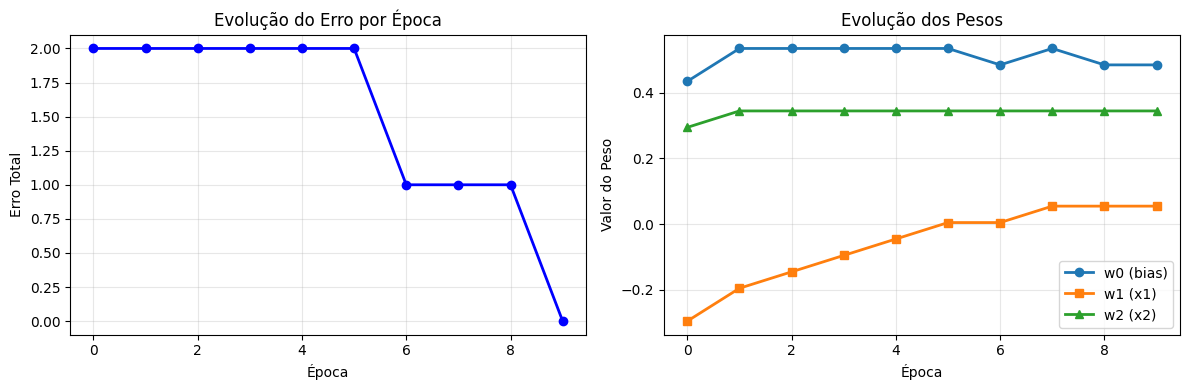


=== AN√ÅLISE DOS RESULTADOS ===
‚Ä¢ Erro inicial: 2
‚Ä¢ Erro final: 0
‚Ä¢ √âpocas necess√°rias: 10
‚Ä¢ Converg√™ncia: Sim
‚Ä¢ Redu√ß√£o do erro: 2
‚Ä¢ Tend√™ncia: Decrescente


In [57]:
# Visualiza√ß√µes
plt.figure(figsize=(12, 4))

# Gr√°fico 1: Evolu√ß√£o do erro
plt.subplot(1, 2, 1)
plt.plot(errors_per_epoch, marker='o', color='blue', linewidth=2)
plt.title('Evolu√ß√£o do Erro por √âpoca')
plt.xlabel('√âpoca')
plt.ylabel('Erro Total')
plt.grid(True, alpha=0.3)

# Gr√°fico 2: Evolu√ß√£o dos pesos
plt.subplot(1, 2, 2)
weights_per_epoch = np.array(weights_per_epoch)
plt.plot(weights_per_epoch[:, 0], label='w0 (bias)', marker='o', linewidth=2)
plt.plot(weights_per_epoch[:, 1], label='w1 (x1)', marker='s', linewidth=2)
plt.plot(weights_per_epoch[:, 2], label='w2 (x2)', marker='^', linewidth=2)
plt.title('Evolu√ß√£o dos Pesos')
plt.xlabel('√âpoca')
plt.ylabel('Valor do Peso')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lise dos resultados
print("\n=== AN√ÅLISE DOS RESULTADOS ===")
print(f"‚Ä¢ Erro inicial: {errors_per_epoch[0]}")
print(f"‚Ä¢ Erro final: {errors_per_epoch[-1]}")
print(f"‚Ä¢ √âpocas necess√°rias: {len(errors_per_epoch)}")
print(f"‚Ä¢ Converg√™ncia: {'Sim' if errors_per_epoch[-1] == 0 else 'N√£o'}")

if len(errors_per_epoch) > 1:
    print(f"‚Ä¢ Redu√ß√£o do erro: {errors_per_epoch[0] - errors_per_epoch[-1]}")
    print(f"‚Ä¢ Tend√™ncia: {'Decrescente' if errors_per_epoch[-1] < errors_per_epoch[0] else 'Est√°vel'}")



=== AN√ÅLISE DE DIFERENTES VALORES DE ALPHA ===
Objetivo: Comparar a converg√™ncia do perceptr√£o para diferentes taxas de aprendizagem
Œ± = 0.01: 18 √©pocas, Convergiu: Sim
Œ± = 0.05:  5 √©pocas, Convergiu: Sim
Œ± = 0.10:  3 √©pocas, Convergiu: Sim
Œ± = 0.20:  2 √©pocas, Convergiu: Sim
Œ± = 0.50:  2 √©pocas, Convergiu: Sim


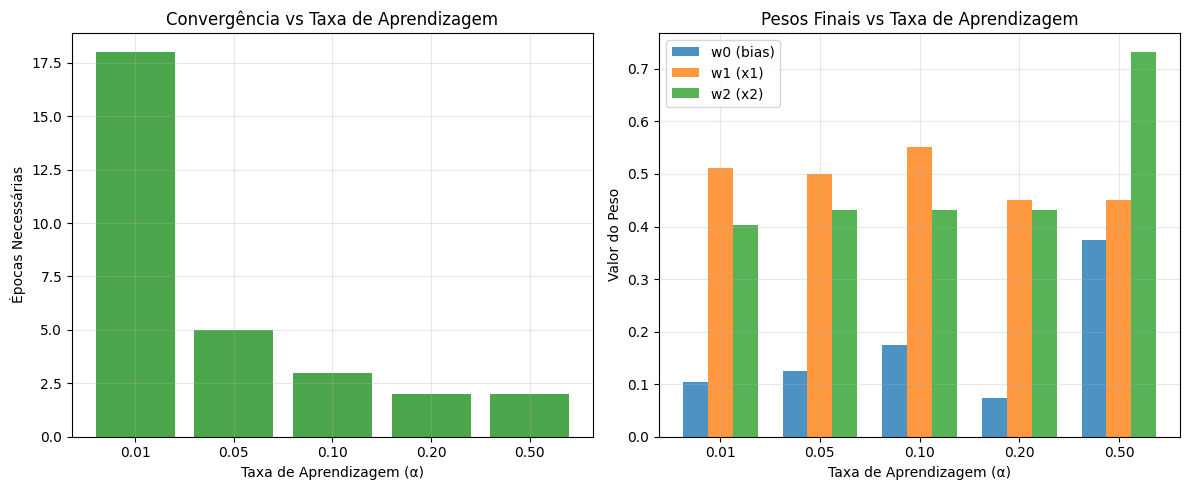


=== AN√ÅLISE DETALHADA ===
Melhor Œ±: 0.20 (2 √©pocas)

Pesos finais para cada Œ±:
Œ± = 0.01: w0= 0.105, w1= 0.511, w2= 0.402
Œ± = 0.05: w0= 0.125, w1= 0.501, w2= 0.432
Œ± = 0.10: w0= 0.175, w1= 0.551, w2= 0.432
Œ± = 0.20: w0= 0.075, w1= 0.451, w2= 0.432
Œ± = 0.50: w0= 0.375, w1= 0.451, w2= 0.732


In [58]:
# 6.c - An√°lise de diferentes valores de alpha
print("\n=== AN√ÅLISE DE DIFERENTES VALORES DE ALPHA ===")
print("Objetivo: Comparar a converg√™ncia do perceptr√£o para diferentes taxas de aprendizagem")

alphas = [0.01, 0.05, 0.1, 0.2, 0.5]
results = []

for alpha in alphas:
    # Reinicializar pesos para cada teste
    np.random.seed(42)
    w_test = np.random.uniform(-0.5, 0.5, 3)
    
    epochs_needed = 0
    converged = False
    
    for epoch in range(20):
        error_epoch = 0
        
        for i in range(len(X)):
            x1, x2 = X[i]
            s = w_test[0] + w_test[1]*x1 + w_test[2]*x2
            o = 1 if s > 0.5 else 0
            e = d[i] - o
            error_epoch += abs(e)
            
            # Atualizar pesos
            w_test[0] += alpha * e
            w_test[1] += alpha * x1 * e
            w_test[2] += alpha * x2 * e
        
        epochs_needed = epoch + 1
        
        if error_epoch == 0:
            converged = True
            break
    
    results.append({
        'alpha': alpha,
        'epochs': epochs_needed,
        'converged': converged,
        'final_weights': w_test.copy()
    })
    
    print(f"Œ± = {alpha:4.2f}: {epochs_needed:2d} √©pocas, Convergiu: {'Sim' if converged else 'N√£o'}")

# Visualiza√ß√£o dos resultados
plt.figure(figsize=(12, 5))

# Gr√°fico 1: √âpocas necess√°rias vs Alpha
plt.subplot(1, 2, 1)
alphas_list = [r['alpha'] for r in results]
epochs_list = [r['epochs'] for r in results]
colors = ['green' if r['converged'] else 'red' for r in results]

plt.bar(range(len(alphas_list)), epochs_list, color=colors, alpha=0.7)
plt.xlabel('Taxa de Aprendizagem (Œ±)')
plt.ylabel('√âpocas Necess√°rias')
plt.title('Converg√™ncia vs Taxa de Aprendizagem')
plt.xticks(range(len(alphas_list)), [f'{a:.2f}' for a in alphas_list])
plt.grid(True, alpha=0.3)

# Gr√°fico 2: Pesos finais para diferentes alphas
plt.subplot(1, 2, 2)
w0_values = [r['final_weights'][0] for r in results]
w1_values = [r['final_weights'][1] for r in results]
w2_values = [r['final_weights'][2] for r in results]

x_pos = np.arange(len(alphas_list))
width = 0.25

plt.bar(x_pos - width, w0_values, width, label='w0 (bias)', alpha=0.8)
plt.bar(x_pos, w1_values, width, label='w1 (x1)', alpha=0.8)
plt.bar(x_pos + width, w2_values, width, label='w2 (x2)', alpha=0.8)

plt.xlabel('Taxa de Aprendizagem (Œ±)')
plt.ylabel('Valor do Peso')
plt.title('Pesos Finais vs Taxa de Aprendizagem')
plt.xticks(x_pos, [f'{a:.2f}' for a in alphas_list])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lise dos resultados
print("\n=== AN√ÅLISE DETALHADA ===")
converged_results = [r for r in results if r['converged']]
if converged_results:
    best_alpha = min(converged_results, key=lambda x: x['epochs'])
    print(f"Melhor Œ±: {best_alpha['alpha']:.2f} ({best_alpha['epochs']} √©pocas)")
else:
    print("Nenhum Œ± convergiu em 20 √©pocas")

print("\nPesos finais para cada Œ±:")
for r in results:
    print(f"Œ± = {r['alpha']:4.2f}: w0={r['final_weights'][0]:6.3f}, w1={r['final_weights'][1]:6.3f}, w2={r['final_weights'][2]:6.3f}")


## Parte 2: Gera√ß√£o e Classifica√ß√£o de Dados Gaussianos 2D

**Exerc√≠cios 7-10**: Gerar dados gaussianos multivariados e treinar perceptr√£o para classifica√ß√£o


=== GERA√á√ÉO DE DADOS GAUSSIANOS 2D ===
Total de pontos: 1000
Distribui√ß√£o 1 (etiqueta 0): 500 pontos
Distribui√ß√£o 2 (etiqueta 1): 500 pontos


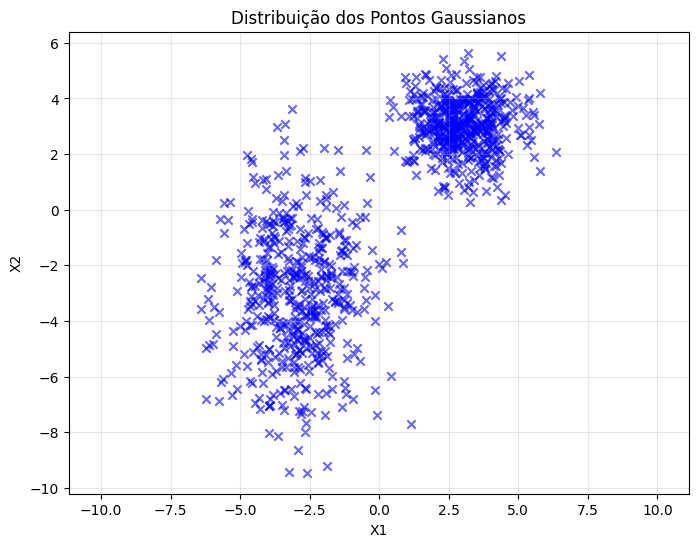

Dados salvos em 'dados_gaussianos_2d.txt'


In [59]:
# Exerc√≠cio 7: Gera√ß√£o de dados gaussianos 2D
print("=== GERA√á√ÉO DE DADOS GAUSSIANOS 2D ===")

# Primeira distribui√ß√£o gaussiana
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T

# Segunda distribui√ß√£o gaussiana
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T

# Combinar dados
c = np.concatenate((a, b), axis=1)
c = c.T

# Adicionar etiquetas (0 para primeira distribui√ß√£o, 1 para segunda)
etiqueta_a = np.zeros((500, 1))
etiqueta_b = np.ones((500, 1))
etiquetas = np.vstack((etiqueta_a, etiqueta_b))
c = np.hstack((c, etiquetas))

# Baralhar dados
np.random.shuffle(c)
c = c.T

# Extrair coordenadas e etiquetas
x = c[0]
y = c[1]
labels = c[2]

print(f"Total de pontos: {len(x)}")
print(f"Distribui√ß√£o 1 (etiqueta 0): {np.sum(labels == 0)} pontos")
print(f"Distribui√ß√£o 2 (etiqueta 1): {np.sum(labels == 1)} pontos")

# Visualizar dados gerados
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='x', alpha=0.6)
plt.title('Distribui√ß√£o dos Pontos Gaussianos')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

# Salvar dados
np.savetxt('dados_gaussianos_2d.txt', c.T, fmt='%.3f', delimiter=',', 
           header='x,y,etiqueta', comments='')
print("Dados salvos em 'dados_gaussianos_2d.txt'")

# Preparar dados para treino
data = c[:2].T  # Coordenadas (x, y)
labels = c[2]   # Etiquetas (0 ou 1)



=== EXERC√çCIO 8: TREINO DO PERCEPTR√ÉO COM DADOS GAUSSIANOS ===
Pesos iniciais: w0=0.343, w1=-0.015, w2=-0.166
Treinando perceptr√£o por 10 √©pocas...
  √âpoca 2: Erro = 4.0
  √âpoca 4: Erro = 5.0
  √âpoca 6: Erro = 5.0
  √âpoca 8: Erro = 3.0
  √âpoca 10: Erro = 3.0
Pesos finais: w0=0.455, w1=-0.241, w2=-0.145
Acur√°cia: 99.7%

=== VISUALIZA√á√ÉO COM 4 CORES ===


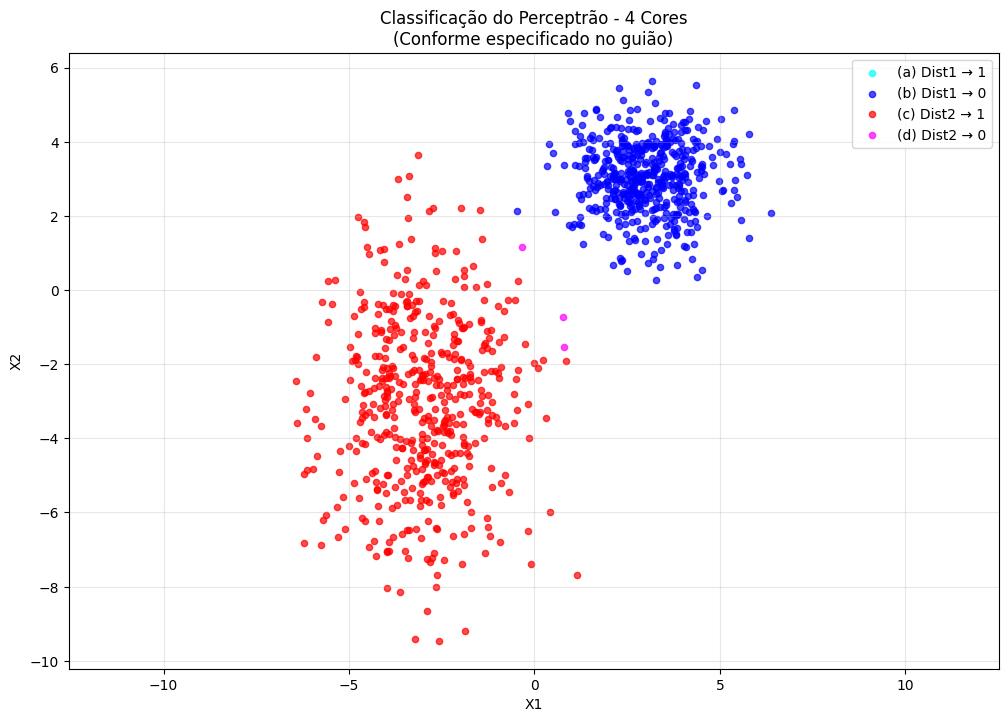


Contagem dos pontos por categoria:
  (a) Dist1 ‚Üí 1: 0 pontos
  (b) Dist1 ‚Üí 0: 500 pontos
  (c) Dist2 ‚Üí 1: 497 pontos
  (d) Dist2 ‚Üí 0: 3 pontos


In [60]:
# Exerc√≠cio 8: Treinar perceptr√£o com dados gaussianos
print("\n=== EXERC√çCIO 8: TREINO DO PERCEPTR√ÉO COM DADOS GAUSSIANOS ===")

# Par√¢metros para dados gaussianos
alpha_gauss = 0.001
epochs_gauss = 10

# Inicializar pesos aleatoriamente
w = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos iniciais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Treinar perceptr√£o
print(f"Treinando perceptr√£o por {epochs_gauss} √©pocas...")
for epoch in range(epochs_gauss):
    delta_w = np.zeros(3)
    total_error = 0
    
    for i in range(len(data)):
        x1, x2 = data[i]
        s = w[0] + w[1]*x1 + w[2]*x2
        o = 1 if s > 0.5 else 0
        e = labels[i] - o
        total_error += abs(e)
        
        delta_w[0] += alpha_gauss * e
        delta_w[1] += alpha_gauss * x1 * e
        delta_w[2] += alpha_gauss * x2 * e
    
    # Atualizar pesos
    w[0] += delta_w[0]
    w[1] += delta_w[1]
    w[2] += delta_w[2]
    
    if (epoch + 1) % 2 == 0:  # Mostrar progresso a cada 2 √©pocas
        print(f"  √âpoca {epoch + 1}: Erro = {total_error:.1f}")

print(f"Pesos finais: w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}")

# Fazer predi√ß√µes
predictions = []
for i in range(len(data)):
    x1, x2 = data[i]
    s = w[0] + w[1]*x1 + w[2]*x2
    o = 1 if s > 0.5 else 0
    predictions.append(o)

predictions = np.array(predictions)

# Calcular acur√°cia
accuracy = np.mean(predictions == labels) * 100
print(f"Acur√°cia: {accuracy:.1f}%")

# Visualiza√ß√£o com 4 cores conforme especificado no gui√£o
print("\n=== VISUALIZA√á√ÉO COM 4 CORES ===")

# Categorizar pontos conforme especificado no gui√£o:
# (a) Pontos gerados pela primeira distribui√ß√£o e classificados com 1 pelo perceptr√£o
# (b) Pontos gerados pela primeira distribui√ß√£o e classificados com 0 pelo perceptr√£o  
# (c) Pontos gerados pela segunda distribui√ß√£o e classificados com 1 pelo perceptr√£o
# (d) Pontos gerados pela segunda distribui√ß√£o e classificados com 0 pelo perceptr√£o

mask_a = (labels == 0) & (predictions == 1)  # (a) Dist1 ‚Üí 1
mask_b = (labels == 0) & (predictions == 0)  # (b) Dist1 ‚Üí 0
mask_c = (labels == 1) & (predictions == 1)  # (c) Dist2 ‚Üí 1
mask_d = (labels == 1) & (predictions == 0)  # (d) Dist2 ‚Üí 0

plt.figure(figsize=(12, 8))
plt.scatter(data[mask_a, 0], data[mask_a, 1], c='cyan', alpha=0.7, s=20, label='(a) Dist1 ‚Üí 1')
plt.scatter(data[mask_b, 0], data[mask_b, 1], c='blue', alpha=0.7, s=20, label='(b) Dist1 ‚Üí 0')
plt.scatter(data[mask_c, 0], data[mask_c, 1], c='red', alpha=0.7, s=20, label='(c) Dist2 ‚Üí 1')
plt.scatter(data[mask_d, 0], data[mask_d, 1], c='magenta', alpha=0.7, s=20, label='(d) Dist2 ‚Üí 0')

plt.title('Classifica√ß√£o do Perceptr√£o - 4 Cores\n(Conforme especificado no gui√£o)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f"\nContagem dos pontos por categoria:")
print(f"  (a) Dist1 ‚Üí 1: {np.sum(mask_a)} pontos")
print(f"  (b) Dist1 ‚Üí 0: {np.sum(mask_b)} pontos")
print(f"  (c) Dist2 ‚Üí 1: {np.sum(mask_c)} pontos")
print(f"  (d) Dist2 ‚Üí 0: {np.sum(mask_d)} pontos")


=== EXERC√çCIO 9: MATRIZ DE CONFUS√ÉO ===
Matriz de Confus√£o:
                Previs√£o
               0    1
Real     0  [ 500    0]
         1  [   3  497]


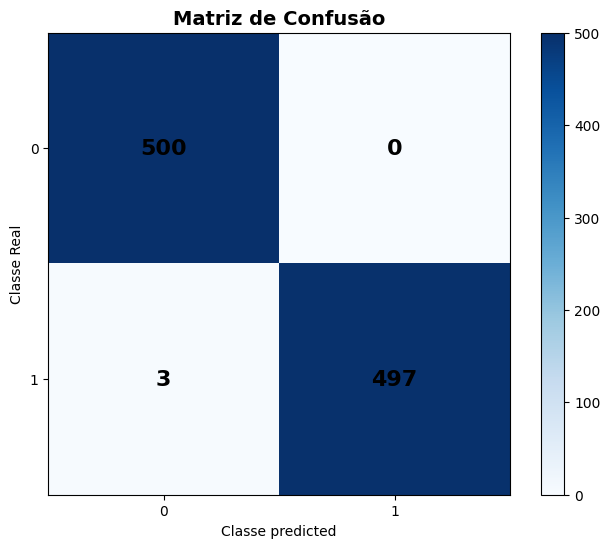


=== RELA√á√ÉO COM AS CORES DO GR√ÅFICO DO PONTO 8 ===
Ciano (a) Dist1‚Üí1 (erro):     0 pontos
Azul (b) Dist1‚Üí0 (correto):   500 pontos
Magenta (d) Dist2‚Üí0 (erro):   3 pontos
Vermelho (c) Dist2‚Üí1 (correto): 497 pontos

=== INTERPRETA√á√ÉO ===
Verdadeiros Positivos (TP): 497 (classe 1 predicted corretamente)
Verdadeiros Negativos (TN): 500 (classe 0 predicted corretamente)
Falsos Positivos (FP):      0 (classe 0 predicted como 1)
Falsos Negativos (FN):      3 (classe 1 predicted como 0)

=== M√âTRICAS ===
Acur√°cia:  0.997 (99.7%)
Precis√£o:  1.000
Recall:    0.994
F1-Score:  0.997


In [61]:
# Exerc√≠cio 9: Matriz de confus√£o
print("\n=== EXERC√çCIO 9: MATRIZ DE CONFUS√ÉO ===")

# Calcular matriz de confus√£o
tn = np.sum(mask_b)  # Verdadeiros Negativos: Dist1 ‚Üí 0 (correto)
fp = np.sum(mask_a)  # Falsos Positivos: Dist1 ‚Üí 1 (erro)
fn = np.sum(mask_d)  # Falsos Negativos: Dist2 ‚Üí 0 (erro)
tp = np.sum(mask_c)  # Verdadeiros Positivos: Dist2 ‚Üí 1 (correto)

confusion_matrix = np.array([[tn, fp], [fn, tp]])

print("Matriz de Confus√£o:")
print("                Previs√£o")
print("               0    1")
print("Real     0  [%4d %4d]" % (confusion_matrix[0,0], confusion_matrix[0,1]))
print("         1  [%4d %4d]" % (confusion_matrix[1,0], confusion_matrix[1,1]))

# Visualizar matriz de confus√£o
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confus√£o', fontsize=14, fontweight='bold')
plt.colorbar()

# Adicionar valores nas c√©lulas
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix[i, j], 
                ha="center", va="center", fontsize=16, fontweight='bold')

plt.ylabel('Classe Real')
plt.xlabel('Classe predicted')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

# Relacionar n√∫meros com cores do gr√°fico anterior
print("\n=== RELA√á√ÉO COM AS CORES DO GR√ÅFICO DO PONTO 8 ===")
print(f"Ciano (a) Dist1‚Üí1 (erro):     {confusion_matrix[0,1]} pontos")
print(f"Azul (b) Dist1‚Üí0 (correto):   {confusion_matrix[0,0]} pontos")  
print(f"Magenta (d) Dist2‚Üí0 (erro):   {confusion_matrix[1,0]} pontos")
print(f"Vermelho (c) Dist2‚Üí1 (correto): {confusion_matrix[1,1]} pontos")

# Interpreta√ß√£o da matriz  
print(f"\n=== INTERPRETA√á√ÉO ===")
print(f"Verdadeiros Positivos (TP): {confusion_matrix[1,1]} (classe 1 predicted corretamente)")
print(f"Verdadeiros Negativos (TN): {confusion_matrix[0,0]} (classe 0 predicted corretamente)")
print(f"Falsos Positivos (FP):      {confusion_matrix[0,1]} (classe 0 predicted como 1)")
print(f"Falsos Negativos (FN):      {confusion_matrix[1,0]} (classe 1 predicted como 0)")

# Calcular m√©tricas b√°sicas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n=== M√âTRICAS ===")
print(f"Acur√°cia:  {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precis√£o:  {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")


In [ ]:
# Exerc√≠cio 10: M√©tricas estat√≠sticas (m√©dia de 30 testes)
print("\n=== M√âTRICAS ESTAT√çSTICAS (30 TESTES) ===")

# Listas para armazenar resultados de cada teste
all_accuracies = []
all_precisions = []
all_recalls = []
all_f1s = []

# Executar 30 testes
for test in range(30):
    # Resetar seed para cada teste
    np.random.seed(test)
    
    # Inicializar pesos aleatoriamente
    w_test = np.random.uniform(-0.5, 0.5, 3)
    
    # Treinar perceptr√£o
    for epoch in range(20):
        delta_w = np.zeros(3)
        error_epoch = 0
        
        for i in range(len(X)):
            x1, x2 = X[i]
            s = w_test[0] + w_test[1]*x1 + w_test[2]*x2
            o = 1 if s > 0.5 else 0
            e = d[i] - o
            error_epoch += abs(e)
            
            delta_w[0] += alpha * e
            delta_w[1] += alpha * x1 * e
            delta_w[2] += alpha * x2 * e
        
        w_test += delta_w
        
        # Verificar converg√™ncia
        if error_epoch == 0:
            break
    
    # Fazer predi√ß√µes
    y_pred_test = []
    for i, (x1, x2) in enumerate(X):
        s_final = w_test[0] + w_test[1]*x1 + w_test[2]*x2
        o_final = 1 if s_final > 0.5 else 0
        y_pred_test.append(o_final)
    
    # Calcular m√©tricas para este teste
    cm = np.zeros((2,2), dtype=int)
    for t, p in zip(d, y_pred_test):
        cm[t, p] += 1
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp+tn)/(tp+tn+fp+fn) if (tp+tn+fp+fn) > 0 else 0
    precision = tp/(tp+fp) if (tp+fp) > 0 else 0
    recall = tp/(tp+fn) if (tp+fn) > 0 else 0
    f1 = 2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0
    
    # Armazenar resultados
    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    
    if (test + 1) % 5 == 0:
        print(f"Teste {test + 1}/30 conclu√≠do")

print(f"RESULTADOS DOS 30 TESTES:")
print(f"  Accuracy: {[float(x) for x in all_accuracies]}")
print(f"  Precis√µes: {[float(x) for x in all_precisions]}")
print(f"  Recalls:   {[float(x) for x in all_recalls]}")
print(f"  F1-Scores: {[float(x) for x in all_f1s]}")

# Verificar se todos convergiram
all_perfect = all(acc == 1.0 for acc in all_accuracies)
print(f"\nüéØ Converg√™ncia: {'‚úÖ Perfeita (30/30)' if all_perfect else '‚ö†Ô∏è Parcial'}")


=== M√âTRICAS ESTAT√çSTICAS (30 TESTES) ===
Teste 5/30 conclu√≠do
Teste 10/30 conclu√≠do
Teste 15/30 conclu√≠do
Teste 20/30 conclu√≠do
Teste 25/30 conclu√≠do
Teste 30/30 conclu√≠do
RESULTADOS DOS 30 TESTES:
  Accuracy: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
  Precis√µes: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0),